In [36]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [21]:
mnist = fetch_openml('mnist_784',version=1,data_home = './data', as_frame=False) #why tf does this take so long. Shit server?

In [22]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [23]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [24]:
#mnist.details

In [25]:
mnist.data #looks like all 0s(white) but there are non-zero floats in there up to 255(black)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
#mnist.data.max().max()

In [27]:
#isinstance(X, pd.DataFrame)

In [28]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [29]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [47]:
some_digit = X[0]
some_other_digit = X[1]
print(some_digit.shape)
some_digit_image = some_digit.reshape(28,28)
some_other_digit_image = some_other_digit.reshape(28,28)

(784,)


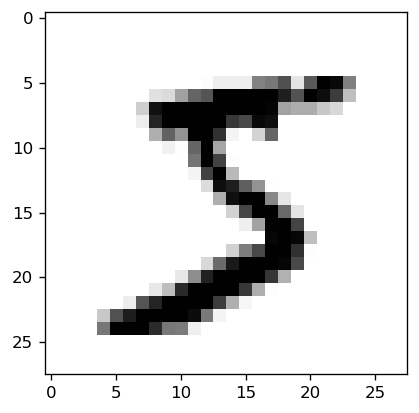

In [48]:
ifig=1;plt.close(ifig);plt.figure(ifig,figsize=(4,4), dpi=120)
plt.imshow(some_digit_image, cmap='binary')

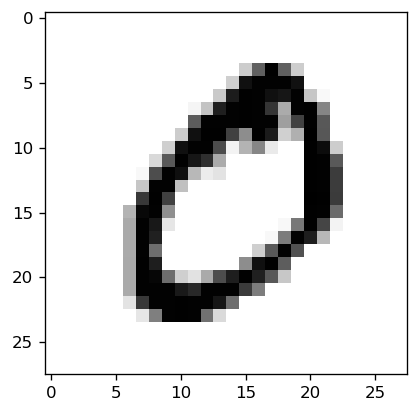

In [49]:
ifig=2;plt.close(ifig);plt.figure(ifig,figsize=(4,4), dpi=120)
plt.imshow(some_other_digit_image, cmap='binary')

In [37]:
#change y values to integers from strings
y = y.astype(np.uint8)

In [38]:
#In this case they have the data already in order to be used as a test and training set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [39]:
y_train_5 = (y_train == 5) #boolean arrays 
y_test_5 = (y_test == 5) 

In [42]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42) #ugh
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [43]:
sgd_clf.predict([some_digit])

array([ True])

In [50]:
sgd_clf.predict([some_other_digit])

array([False])